In [3]:
using Plots


u(x) = x^4/24 - x^3/12 + x/24

In [16]:
N = 10; 
h = 1/N;
xstart = 0. 
xend = 1.
x = Vector(xstart:h:xend);

In [17]:
# define the so-called source function 
function U(x)
    #return x^4/12-x/12+1/2
    #return x^2/2-x/2
    #return x^2/2-x/2+1/2 # case 1
    return x^4/12-x^3/6+x^2/8+x/2-1/24 # case 2
end 
f = U.(x);

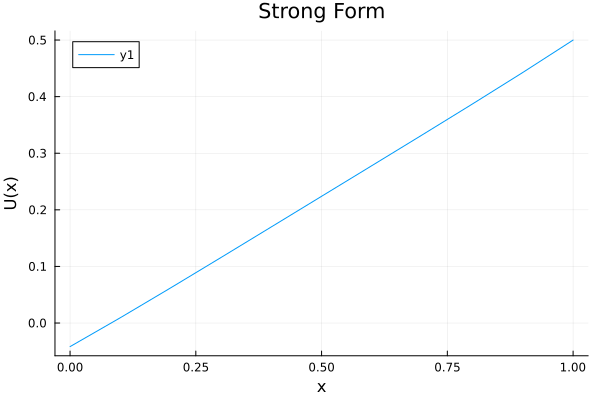

In [18]:
plot(x,f)
title!("Strong Form")
xlabel!("x")
ylabel!("U(x)")

Weak form

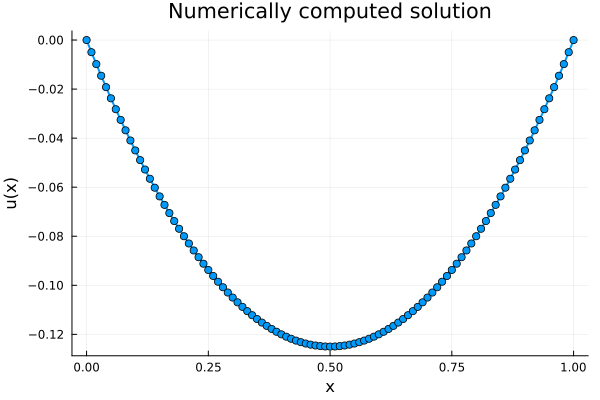

In [36]:
#..construct the mesh: see before 
nelements = 100; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1)

#..Mesh with points and edges 
#..point holds the coordinates of the left and right node of the element
#..edges holds the global indices of the left and right node of the element
points = collect( [x[i], x[i+1]] for i in 1:nelements) 
edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
#fsource(x) = x*(x-1)
fsource(x) = 1

#..Initialize local and global matrix and right-hand side value 
floc = zeros(Float64,2, 1)
Aloc = zeros(Float64,2,2)
A = zeros(Float64,nnodes, nnodes)
f = zeros(Float64,nnodes)  

#..Perform loop over elements and assemble global matrix and vector 
for i=1:nelements 

  xl, xr = points[i,:][1]
  floc = -(xr-xl)/2 * [fsource(xl), fsource(xr)]
  Aloc = (1/(xr-xl))*[1 -1; -1 1]

  for j=1:2 
    f[edges[i][j]] += floc[j]
    for k =1:2 
      A[edges[i][j], edges[i][k]] += Aloc[j,k]
    end 
  end 

end

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;    f[end] = 0

#..solve the linear system
u = A \ f

#..plot the solution  
p1=plot(x,u,shape=:circle,lw=2,legend=false)
xlabel!("x") 
ylabel!("u(x)")
title!("Numerically computed solution")